# Reward Training Analysis - mPFC PE Time Analysis

Determining when PE Data ends

Is it related to tone?

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"
brain_region = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00
save_path = r'graphs'
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test"


In [3]:
exp = Reward_Training(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p1-240607-065311\Notes.txt
read from t=0s to t=1684.75s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p2-240607-092425\Notes.txt
read from t=0s to t=1761.77s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p3-240607-115203\Notes.txt
read from t=0s to t=1753.91s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p5-240911-050744\Notes.txt
read from t=0s to t=1687.06s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p6-240911-073819\Notes.txt
read from t=0s to t=1686.97s
Found Synapse note file: C:\Users\alber\

Reward Training Processing - Create DA df and obtain DA metrics

In [4]:
def run_rtc_pipeline(exp, experiment_path):
    exp.rtc_processing()
    exp.create_base_df(experiment_path)
    exp.remove_specified_subjects()
    exp.extract_da_columns()
    exp.find_first_port_entry_after_sound_cue()
    exp.compute_closest_port_offset(
        PE_column='first_PE_after_sound_cue',
        offset_column='filtered_port_entry_offset'
    )

    # Choose either standard or EI DA
    # exp.compute_standard_DA()  # for all tones, calculate the standard DA response (-4s ->10s) for both tone and lick
    exp.compute_EI_DA(tone_window = (-4,30),
                      pe_window = (0,20),
                      baseline_window = (-4,0)

    )  # for all tones, calculate the event-induced DA response (-4s ->10s) for both tone and lick

    exp.compute_rtc_da_metrics()

run_rtc_pipeline(exp, experiment_path=experiment_path)

Processing trial p1-240607-065311...
Processing trial p2-240607-092425...
Processing trial p3-240607-115203...
Processing trial p5-240911-050744...
Processing trial p6-240911-073819...
Processing trial p7-240911-100647...
Processing trial p8-240911-123255...
Processing trial pp1-250202-105839...
Processing trial pp2-250202-105839...
Processing trial pp3-250202-093829...
Processing trial pp4-250202-093829...
Processing trial pp5-250202-054445...
Processing trial pp6-250202-054445...
Processing trial pp7-250202-042018...
Processing trial pp8-250202-042018...


## Finding DA metrics

Code to look at a single trial DA response

In [5]:
# # Select a trial (e.g., the first trial)
# trial = df.iloc[0]

# # Extract the first tone and lick responses (if multiple events exist)
# tone_time = trial['Tone Event_Time_Axis'][0]  # should be -pre_time to post_time
# tone_zscore = trial['Tone Event_Zscore'][0]
# lick_time = trial['Lick Event_Time_Axis'][0]  # should be 0 to post_time
# lick_zscore = trial['Lick Event_Zscore'][0]

# # Plotting both traces
# plt.figure(figsize=(8, 4))
# plt.plot(tone_time, tone_zscore, label='Tone Event (Sound Cue)')
# plt.plot(lick_time, lick_zscore, label='Lick Event')
# plt.axhline(0, color='gray', linestyle='--')
# plt.axvline(0, color='gray', linestyle='--')
# plt.xlabel('Time (s)')
# plt.ylabel('Baseline-corrected z-score')
# plt.title('Tone and Lick DA Responses')
# plt.legend()
# plt.show()


## PSTH For first and last tones

No trials have an event at index 1 for Tone.


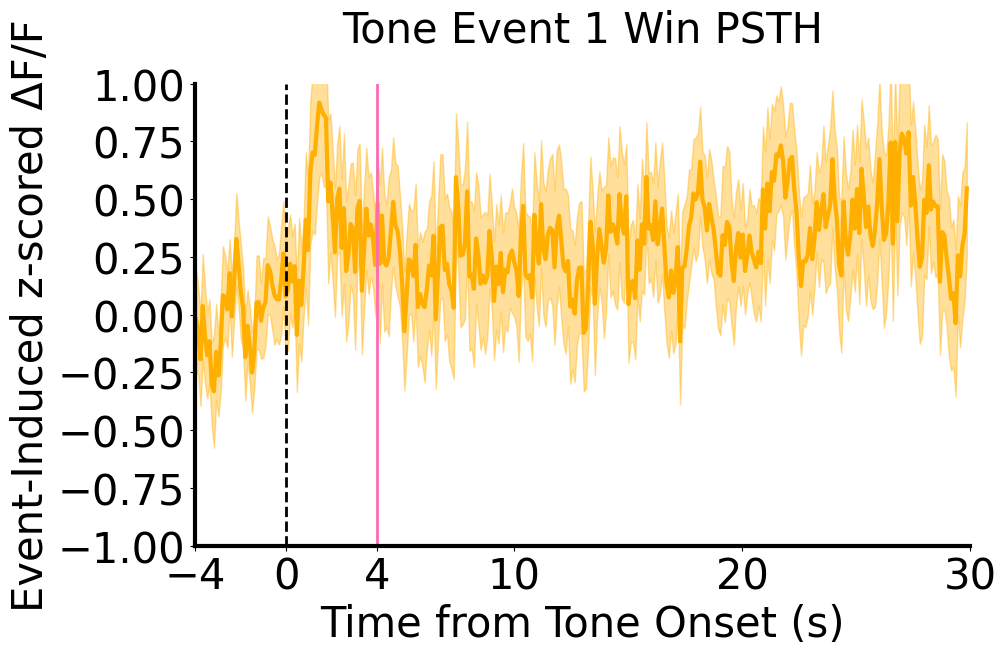

In [6]:
exp.plot_specific_event_psth(event_type='Tone', 
                             event_index = 1, directory_path=None, 
                             brain_region='NAc', 
                             condition= '', y_min=-1, y_max=5, bin_size=100)
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=1,  bin_size=100)

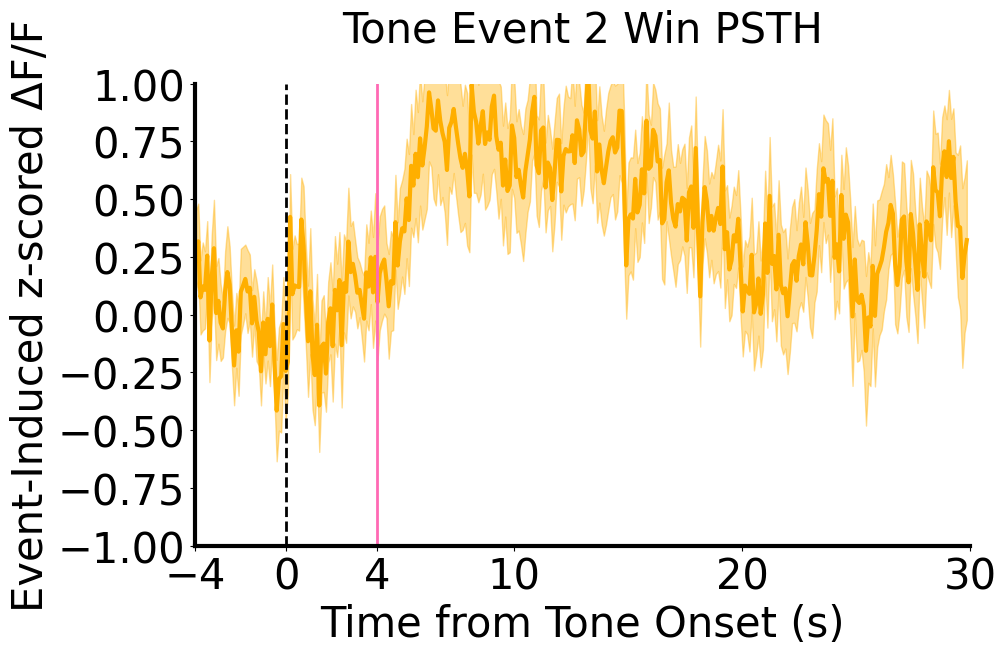

In [7]:
exp.plot_specific_event_psth(event_type='Tone', event_index = 2, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=1,  bin_size=100)

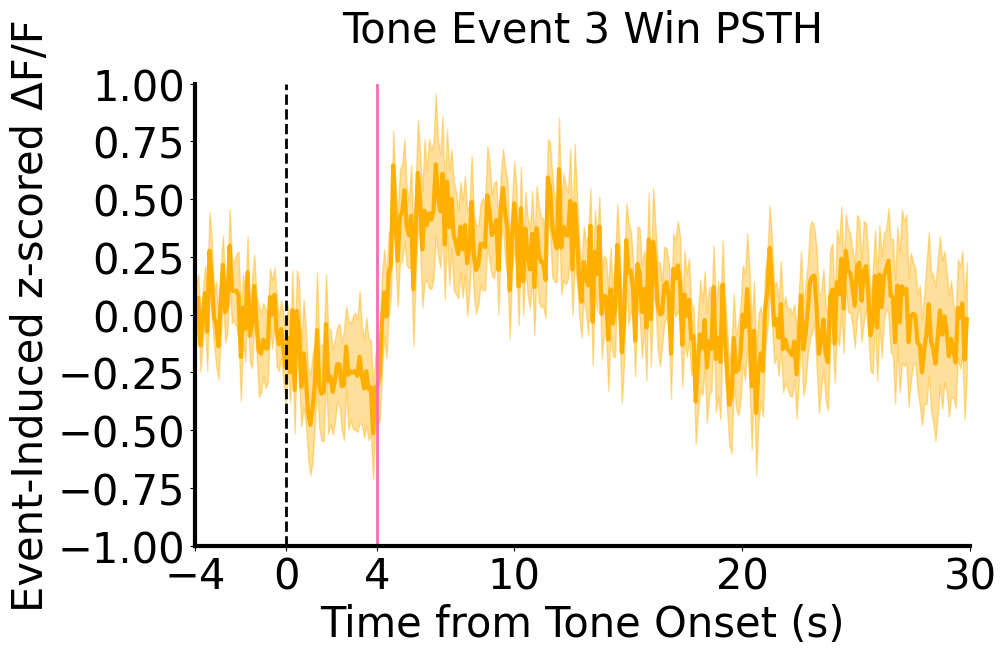

In [8]:
exp.plot_specific_event_psth(event_type='Tone', event_index = 3, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=1,  bin_size=100)

No trials have an event at index 15 for Tone.


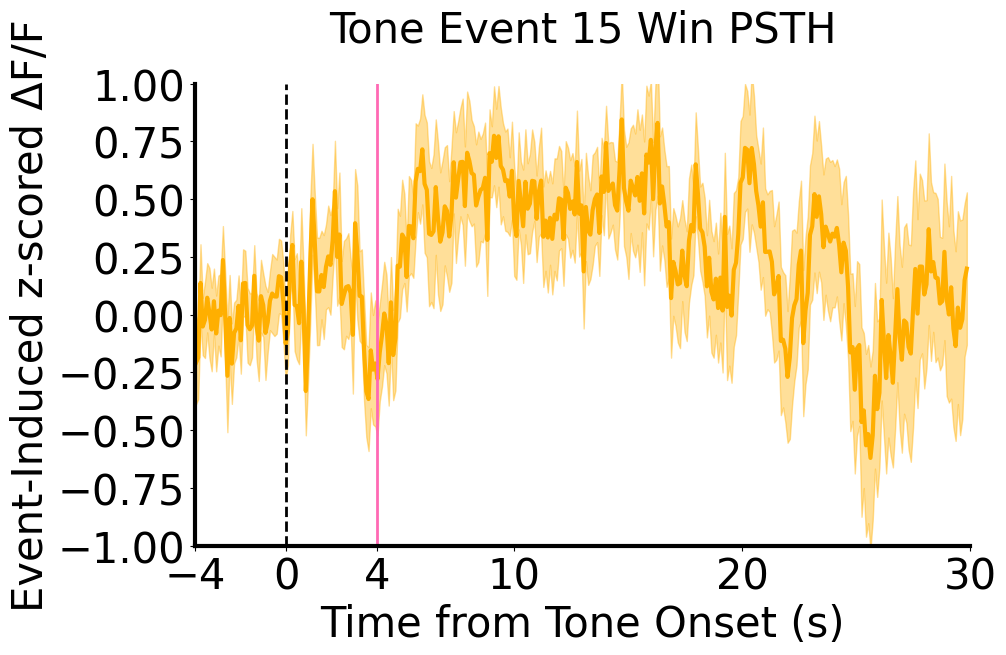

In [9]:
exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, bin_size=100)
exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=None, brain_region='mPFC', y_min=-1, y_max=1, bin_size=100)

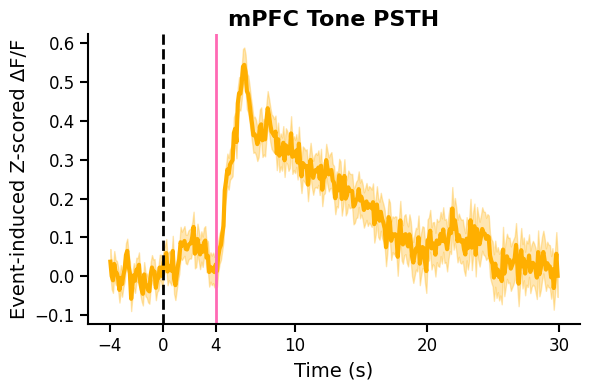

In [10]:
exp.plot_group_PETH(
    event_type='Tone', brain_region='mPFC'
)

In [11]:
exp.plot_group_PETH(
    event_type='Tone', brain_region='NAc'
)

No data for region NAc


Individual plots

No data for Tone event #1 in NAc


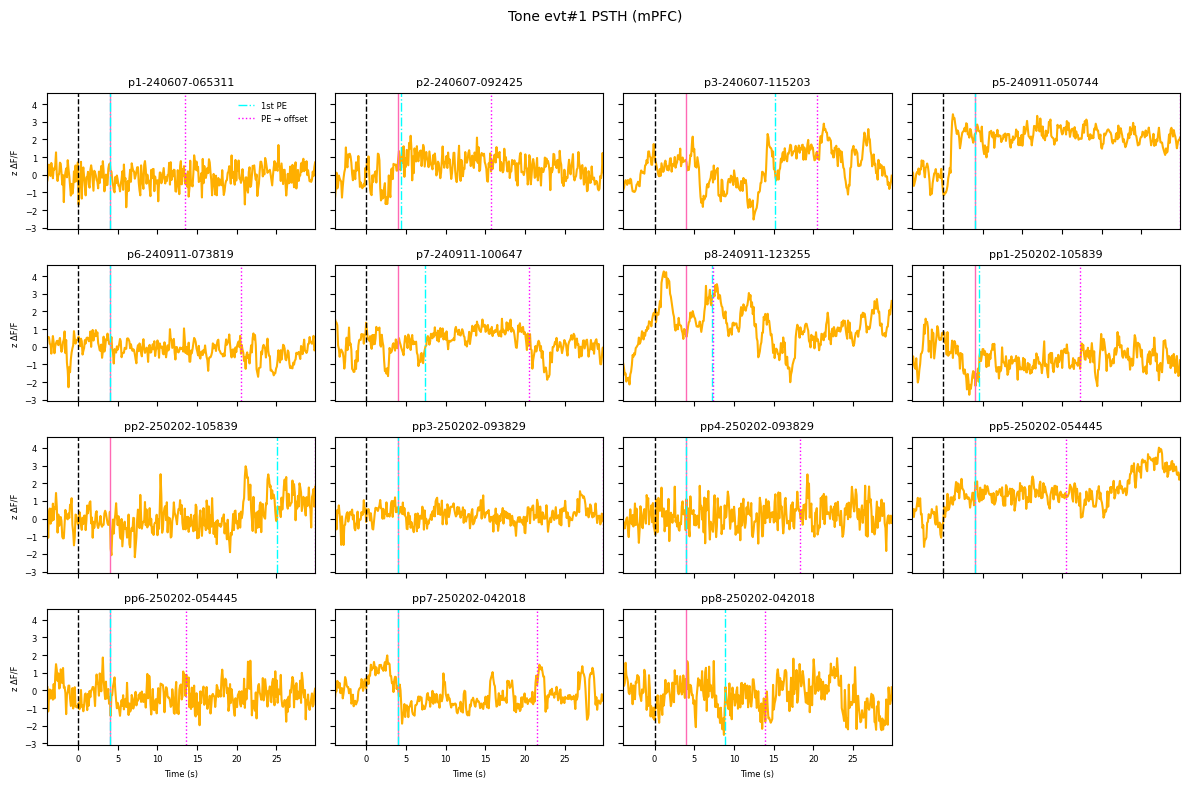

,file_name,event_type,event_index,brain_region,first_PE_rel_s,offset_rel_s
0,p1-240607-065311,Tone,1,mPFC,4.000000,13.480100
1,p2-240607-092425,Tone,1,mPFC,4.269998,15.730115
2,p3-240607-115203,Tone,1,mPFC,15.119974,20.419871
3,p5-240911-050744,Tone,1,mPFC,4.000000,33.510031
4,p6-240911-073819,Tone,1,mPFC,4.000000,20.519977
5,p7-240911-100647,Tone,1,mPFC,7.489946,20.480000
6,p8-240911-123255,Tone,1,mPFC,7.300055,7.390003
7,pp1-250202-105839,Tone,1,mPFC,4.560159,17.250222
8,pp2-250202-105839,Tone,1,mPFC,25.070305,31.060296
9,pp3-250202-093829,Tone,1,mPFC,4.000000,35.030303


In [14]:
exp.plot_PETH_index_grid(df=exp.da_df,brain_region='NAc',event_type='Tone',event_index=1)
exp.plot_PETH_index_grid(df=exp.da_df,brain_region='mPFC',event_type='Tone',event_index=1)

In [20]:
import numpy as np
import pandas as pd

def compute_PE_durations(df,
                         pe_col:       str = 'first_PE_after_sound_cue',
                         offset_col:   str = 'closest_PE_offset',
                         duration_col: str = 'PE_duration'):
    """
    For each row in df, compute per-event durations = (offset_time - PE_time).
    Returns a new DataFrame with a list-column `duration_col`.
    """
    out = df.copy()
    durations = []

    for _, row in out.iterrows():
        raw_pes  = row.get(pe_col)
        raw_offs = row.get(offset_col)

        # turn whatever you grabbed into a proper Python list
        if isinstance(raw_pes, (list, np.ndarray)):
            pes = list(raw_pes)
        else:
            pes = []

        if isinstance(raw_offs, (list, np.ndarray)):
            offs = list(raw_offs)
        else:
            offs = []

        # Now zip them (zip will stop at the shorter one) 
        # and do offset - pe so it comes out positive
        durs = []
        for pe, off in zip(pes, offs):
            if pe is None or off is None or pd.isna(pe) or pd.isna(off):
                durs.append(np.nan)
            else:
                durs.append(off - pe)

        # If you want to preserve exact length (e.g. placeholders=True style),
        # you could pad the shorter list here with np.nan, but typically zip is fine.

        durations.append(durs)

    out[duration_col] = durations
    return out


In [30]:
df2 = compute_PE_durations(exp.da_df,
                           pe_col='first_PE_after_sound_cue',
                           offset_col='closest_PE_offset',
                           duration_col='PE_duration')

In [29]:
df2.head()

,subject_name,file name,trial,filtered_sound_cues,filtered_port_entries,filtered_port_entry_offset,first_PE_after_sound_cue,closest_PE_offset,Tone_Time_Axis,Tone_Zscore,...,PE_Zscore,Tone AUC,Tone Max Peak,Tone Time of Max Peak,Tone Mean Z-score,PE AUC,PE Max Peak,PE Time of Max Peak,PE Mean Z-score,PE_duration
0,p1,p1-240607-065311,<trial_class.Trial object at 0x00000262663F6120>,"[240.10817536, 320.10878976, 320.87261184, 410...","[180.86756352, 187.53765376, 192.4677632, 196....","[182.88771072, 189.1278848, 195.10771712, 199....","[244.10817536, 324.10878976, 324.87261184, 414...","[253.5882752, 328.78870528, 328.78870528, 418....","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[0.02220517845069009, 0.02267268354620802, 0....",...,"[[0.6943746074117472, 0.6966605397873343, 0.69...","[-0.8017312743856245, -3.4284445917712416, -3....","[1.2723024309893856, 0.45758096657585573, 0.60...","[0.3656805508621801, 0.48462838843352074, 3.54...","[-0.20031230992693047, -0.8574770186138368, -0...","[-1.025555415836713, -1.068428399919774, -1.22...","[1.132858133985286, 0.9184506270680464, 0.8670...","[3.972464558890806, 2.8950527408892412, 2.1312...","[-0.256142067813107, -0.26715165661880186, -0....","[9.480099840000008, 4.679915520000009, 3.91609..."
1,p2,p2-240607-092425,<trial_class.Trial object at 0x0000026209C2AF00>,"[241.89272064, 321.8931712, 411.89392384, 491....","[181.89221888, 184.45238272, 188.52265984, 200...","[184.16222208, 188.04228096, 189.31253248, 205...","[246.16271872, 325.8931712, 415.89392384, 495....","[257.6228352, 391.42375424, 424.61396992, 542....","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[-0.13589221255243375, -0.1423023091014818, -...",...,"[[0.5439034845124902, 0.5350755230955377, 0.52...","[-0.9476864947080376, -1.3779359489562437, -3....","[1.6667472367464278, 1.610700156371614, 1.4750...","[1.615124365351221, 0.21822455387291484, 0.284...","[-0.23684993210688352, -0.3445030032530564, -0...","[3.9060005491083087, -2.66532222199598, 0.2555...","[2.271290175883784, 0.8846236593295007, 2.2695...","[1.3369343727026717, 0.39616511191115933, 0.23...","[0.9763593832719908, -0.66621044333766, 0.0640...","[11.46011648000001, 65.53058304000001, 8.72004..."
2,p3,p3-240607-115203,<trial_class.Trial object at 0x000002620951CF20>,"[248.47630336, 328.47675392, 418.47734272, 498...","[197.36608768, 200.20576256, 203.33576192, 206...","[199.40573184, 201.33576704, 204.19575808, 208...","[263.59627776, 332.47675392, 422.47734272, 502...","[268.89617408, 356.10689536, 438.69732864, 548...","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[-0.9134735322446678, -0.9134438871486684, -0...",...,"[[0.5013253977050955, 0.5013220622137017, 0.50...","[2.3759834954815924, -3.33366863778257, 0.3429...","[1.670461266926762, 0.776463890159688, 0.91279...","[3.2341912122933536, 0.22412279375248545, 1.28...","[0.5942169940485784, -0.83355677965699, 0.0857...","[4.131845374100437, 1.5180109691890251, 2.8689...","[2.275812295824915, 1.607843364716814, 1.87655...","[3.4966732086054435, 2.935357380066307, 2.8419...","[1.0329107459495082, 0.3794222535904248, 0.717...","[5.299896319999959, 23.63014143999999, 16.2199..."
3,p5,p5-240911-050744,<trial_class.Trial object at 0x0000026209C79D90>,"[242.65998336, 322.66043392, 412.66102272, 492...","[182.6594816, 190.0896256, 199.82974976, 203.0...","[183.41953536, 192.069632, 200.18970624, 203.4...","[246.65998336, 330.7405312, 419.03112192, 496....","[276.17001472, 401.31084288, 432.49106944, 502...","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[0.49635987719793273, 0.4948352739768804, 0.4...",...,"[[2.2801172544825916, 2.2830606991519025, 2.28...","[6.7077482241531285, 3.124548942821561, -5.458...","[3.5695931892619055, 1.95152745189648, 1.13374...","[1.2749925322959825, 0.9151998996421753, 0.524...","[1.6771124909924784, 0.7811105621614689, -1.36...","[8.361634172263065, 5.35243314576525, 0.622690...","[3.0048418899447817, 2.5090017021332502, 1.001...","[0.330

In [33]:
import numpy as np

# 1) pull out all of the PE_duration lists
all_lists = df2['PE_duration'].tolist()

# 2) flatten into one big list
all_durs = [d for sub in all_lists for d in sub]

# 3) convert to an array
all_durs = np.array(all_durs, dtype=float)

# 4) build a mask of only the finite entries
finite_mask = np.isfinite(all_durs)

# 5) apply it
clean   = all_durs[finite_mask]

# 6) compute the mean
mean_duration = clean.mean() if clean.size > 0 else np.nan

print(f"Average PE duration (across all events): {mean_duration:.2f} s")


Average PE duration (across all events): 15.09 s


## Heat maps

In [13]:
exp.plot_event_index_heatmap(event_type = 'Tone', 
                             max_events = 1, 
                             directory_path = None, 
                             brain_region = 'NAc', 
                             vmin = -0.2, 
                             vmax = 6, df=None, bin_size=100)

# exp.plot_event_index_heatmap(event_type = 'Tone', 
#                              max_events = 15, 
#                              directory_path = save_path,
#                              brain_region = 'mPFC', 
#                              vmin = -0.3, 
#                              vmax = 2, df=None, bin_size=100)

IndexError: single positional indexer is out-of-bounds